In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mplsoccer.pitch import Pitch, VerticalPitch
import numpy as np
from scipy.spatial import ConvexHull
from scipy import stats
import seaborn as sns
import ipywidgets as widgets
from highlight_text import  ax_text, fig_text
import warnings

#Read in the data
df = pd.read_csv('DL.csv', encoding='latin-1')

#Adjust to pitch size
df['X'] = df['X']*1.2
df['Y'] = df['Y']*.8

df = df[['Player','Number','Event','X', 'Y']]
df

,Player,Number,Event,X,Y
0,Declan Lambert,12,Tackle,10.8,77.6
1,Declan Lambert,12,Interception,18.0,69.6
2,Declan Lambert,12,Interception,24.0,28.8
3,Declan Lambert,12,Interception,25.2,67.2
4,Declan Lambert,12,Clearance,12.0,20.0
5,Declan Lambert,12,Clearance,10.8,52.0
6,Declan Lambert,12,Clearance,10.8,47.2
7,Declan Lambert,12,Clearance,8.4,49.6
8,Declan Lambert,12,Recovery,6.0,71.2
9,Declan Lambert,12,Recovery,9.6,68.8


In [2]:
#Categorize all of the defensive actions using 'successful' dataframe (Except for Foul)
Tackledf = df.loc[df['Event']== "Tackle"]
Interceptiondf = df.loc[df['Event']== "Interception"]
Clearancedf = df.loc[df['Event']== "Clearance"]
Recoverydf = df.loc[df['Event']== "Recovery"]

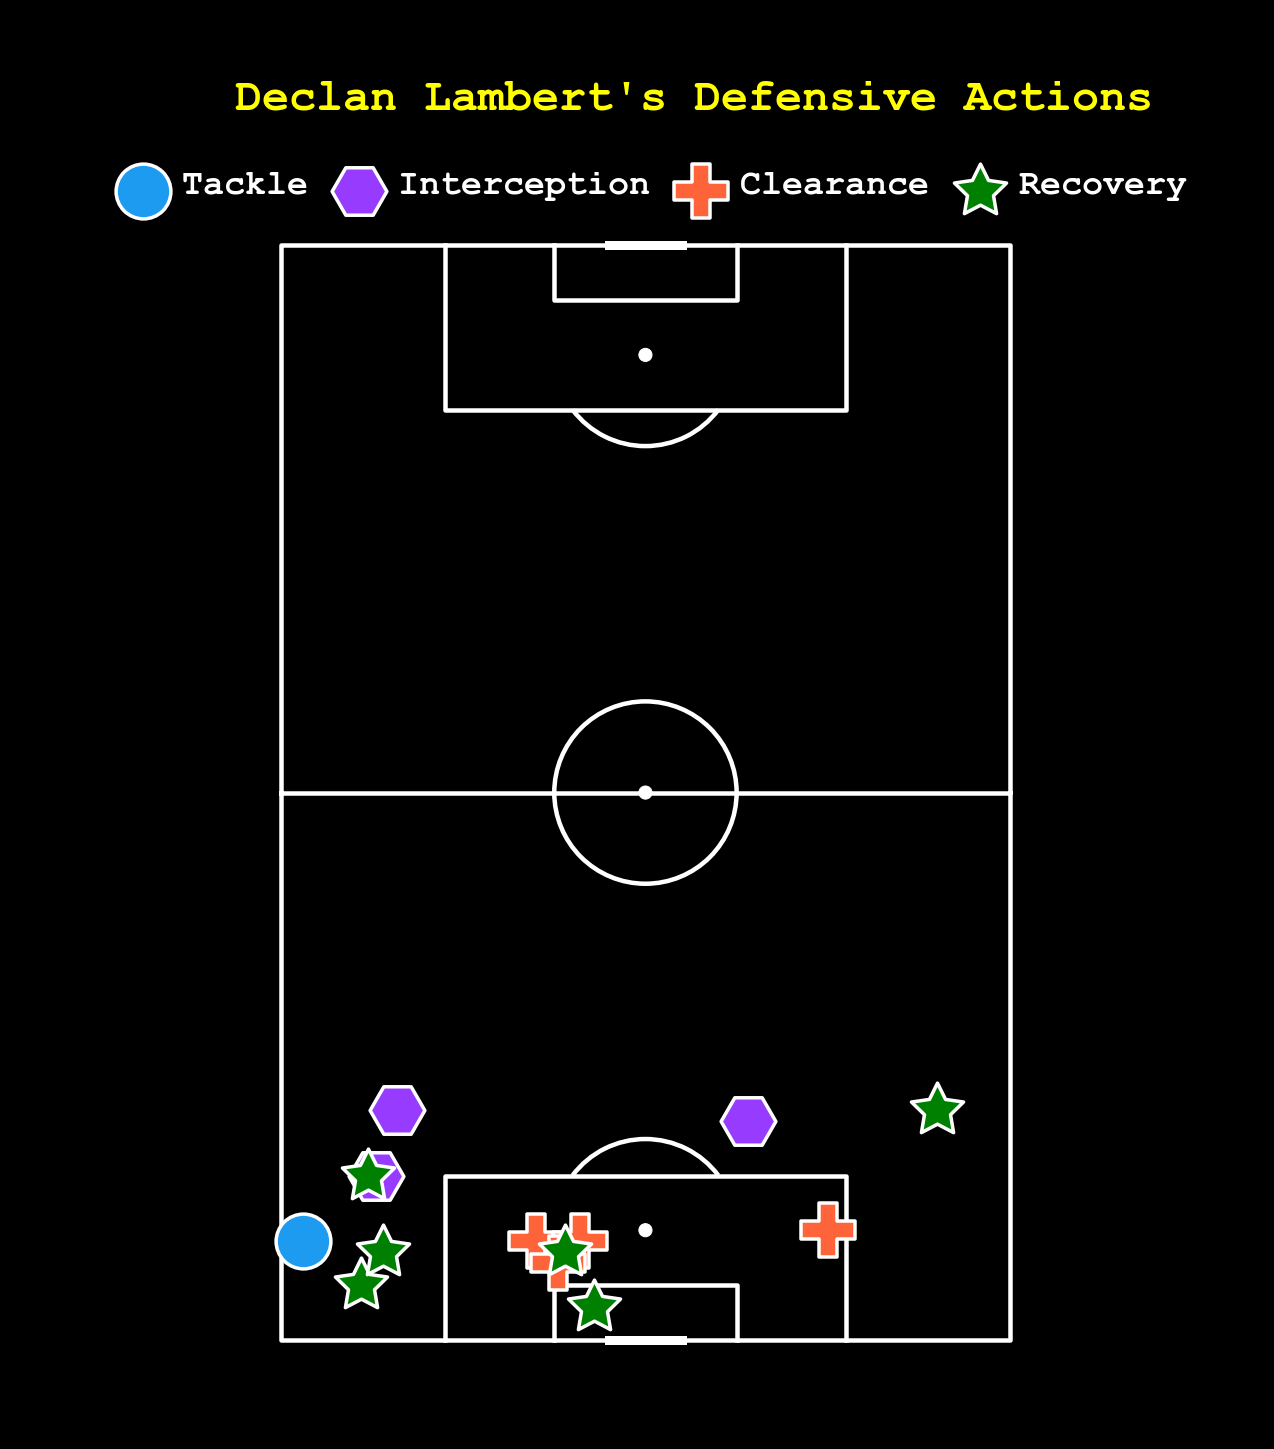

In [3]:
#Set up pitch
pitch = VerticalPitch(pitch_type='statsbomb', 
                  pitch_color='#000000', line_color='white',half = False,
                  line_zorder=1, linewidth=4.5, spot_scale=0.006)

fig,ax = pitch.draw(figsize=(30, 20), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#000000')

#Inverse the y-axis
plt.gca().invert_xaxis()

#Plot points
if Tackledf.empty == False:
    pitch.scatter(Tackledf.X,Tackledf.Y, marker='o', s=3000, c='#1d9bf0', edgecolor='w', linewidth=3.5, label=' Tackle ',ax=ax)

if Interceptiondf.empty == False:
    pitch.scatter(Interceptiondf.X,Interceptiondf.Y, marker='H', s=3000, c='#973cff', edgecolor='w',linewidth=3.5,  label=' Interception ',ax=ax)

if Clearancedf.empty == False:
    pitch.scatter(Clearancedf.X,Clearancedf.Y, marker='P', s=3000, c='#ff633a', edgecolor='w', linewidth=3.5, label=' Clearance ',ax=ax)

if Recoverydf.empty == False:
    pitch.scatter(Recoverydf.X,Recoverydf.Y, marker=(5,1), s=3000, c='#008000', edgecolor='w', linewidth=3.5, label=' Recovery ',ax=ax)

#Title
plt.text(85,135,"Declan Lambert's Defensive Actions",color='yellow',
          size=45, fontfamily = "Courier New", fontweight = "bold")

# setup the legend
legend = ax.legend(loc='center left', bbox_to_anchor=(-0.15, 1.02),facecolor='#000000', edgecolor='None',
                   labelspacing=10, ncol=5)

for text in legend.get_texts():
    text.set_fontsize(35)
    text.set_fontfamily("Courier New")
    text.set_fontweight("bold")
    text.set_color('white')

ax.text(40,145, 'Space', va='center', ha='left', fontsize=25, color='black',fontweight='bold',fontfamily='Courier New')
ax.text(-20, -10, 'Space', va='center', ha='left', fontsize=25, color='black',fontweight='bold',fontfamily='Courier New')
ax.text(110, -10, 'Space', va='center', ha='left', fontsize=25, color='black',fontweight='bold',fontfamily='Courier New')


plt.show()

In [6]:
#Remove warning
pd.options.mode.chained_assignment = None

#Adjust to pitch (for inside own box)
Tackledf['X'] = 120 - Tackledf['X']
Tackledf['Y'] = 80 - Tackledf['Y']
Interceptiondf['X'] = 120 - Interceptiondf['X']
Interceptiondf['Y'] = 80 - Interceptiondf['Y']
Clearancedf['X'] = 120 - Clearancedf['X']
Clearancedf['Y'] = 80 - Clearancedf['Y']
Recoverydf['X'] = 120 - Recoverydf['X']
Recoverydf['Y'] = 80 - Recoverydf['Y']

In [5]:
#Set up pitch
mpl.rcParams['figure.dpi'] = 500
pitch = VerticalPitch(pitch_type='statsbomb', 
                  pitch_color='#000000', line_color='white',half = True,
                  line_zorder=1, linewidth=8, spot_scale=0.003)

fig,ax = pitch.draw(figsize=(30, 20), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#000000')

#Inverse the y-axis
plt.gca().invert_yaxis()

#Plot points
if Recoverydf.empty == False:
    pitch.scatter(Recoverydf.X,Recoverydf.Y, marker=(5,1), s=5000, c='#008000', edgecolor='w', linewidth=5, ax=ax)

if Clearancedf.empty == False:
    pitch.scatter(Clearancedf.X,Clearancedf.Y, marker='P', s=5000, c='#ff633a', edgecolor='w', linewidth=5, ax=ax)

if Tackledf.empty == False:
    pitch.scatter(Tackledf.X,Tackledf.Y, marker='o', s=5000, c='#1d9bf0', edgecolor='w', linewidth=5, ax=ax)

if Interceptiondf.empty == False:
    pitch.scatter(Interceptiondf.X,Interceptiondf.Y, marker='H', s=5000, c='#973cff', edgecolor='w',linewidth=5, ax=ax)

#Title & Annotations
fig.suptitle("\n\nDeclan Lambert's Defensive Actions\n\n", fontsize=65, color='yellow',
            fontfamily = "Courier New", fontweight = "bold",y=0.98)

highlight_textprops =\
    [{"color": "#ff633a","fontweight": 'bold'},
     {"color": "#1d9bf0","fontweight": 'bold'},
     {"color": "#973cff","fontweight": 'bold'},
     {"color": "#008000","fontweight": 'bold'}
    ]

Title = fig_text(s = "<Clearance:> 4 | <Tackle:> 1 | <Interception:> 3 | <Recovery:> 6" ,
        x = 0.5, y = 0.83, highlight_textprops = highlight_textprops ,color='white',
        fontfamily = "Courier New",fontweight='bold', ha='center',fontsize=41)

ax.text(-10, 70, 'space', va='center', ha='left', fontsize=25, color='black',
        fontweight = "bold",fontfamily = "Courier New")

ax.text(86, 70, 'space', va='center', ha='left', fontsize=25, color='black',
        fontweight = "bold",fontfamily = "Courier New")

plt.show()